<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


#### **CURSO DE PÓS-GRADUAÇÃO EM CIÊNCIA DE DADOS (BIG DATA PROCESSING AND ANALYTICS)**
**Componente curricular:** PARADIGMAS DE LINGUAGEM DE PROGRAMAÇÃO EM CIÊNCIA DE DADOS [TURMA 01D] - 2022/1 - Trilha 4.<br>

**Aluno:** ROBSON DE FREITAS SAMPAIO.<br>

**URL deste notebook:** https://github.com/rfsampaio/postgraduate_data_science/blob/main/notebooks/PL_A4.ipynb<br>
***

### **Análise Exploratória de Dados (EDA).**
#### **Caso: objetivando exercitar a manipulação de datasets de diversas origens, buscamos unir dados de datasets localizados em https://wid.world/ e em https://www.gapminder.org/. Os dados versam sobre informações econômicas e macroenconômicas de diversos países do mundo. Nessa análise escolhemos apenas dados relacionados ao Brasil.**

#### **Exploração inicial dos Dados**

In [117]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import locale

%matplotlib inline

locale.setlocale(locale.LC_ALL, "pt_BR.UTF-8")

# datasets GAP: https://www.gapminder.org/
# acesso ao serviço de Saneamento Básico
dfSanitation = pd.read_csv("../data/GAP_at_least_basic_sanitation_overall_access_percent.csv")
# Índice de Desenvolvimento Humano (IDH)
dfHdi = pd.read_csv("../data/GAP_hdi_human_development_index.csv")
# expectativa de vida da população
dfLife = pd.read_csv("../data/GAP_life_expectancy_years.csv")
# número de assassinatos ocorridos
dfMurders = pd.read_csv("../data/GAP_murder_total_deaths.csv")
# % de pessoas na extrema pobreza, vivendo com menos de USD 5,50/dia
dfPoverty = pd.read_csv("../data/GAP_poverty_percent_people_below_550_a_day.csv")

# dataset WID: https://wid.world/
# diversas informações econômicas, macroenconômicas e populacional dos países
dfWidBR = pd.read_csv("../data/WID_data_BR.csv")

# modificando o valor da série "country" no dataset WID
dfWidBR.loc[:, "country"] = "Brazil"
dfWidBR.head()


,country,variable,percentile,year,value,age,pop
0,Brazil,sptinc999j,p68p69,1820,"0,01",999,j
1,Brazil,sptinc999j,p68p69,1850,"0,01",999,j
2,Brazil,sptinc999j,p68p69,1880,"0,01",999,j
3,Brazil,sptinc999j,p68p69,1900,"0,01",999,j
4,Brazil,sptinc999j,p68p69,1910,"0,01",999,j


#### **Qualidade dos Dados**

In [118]:
import pandas as pd
from functools import reduce

# definindo a precisão do ponto flutuante
pd.set_option("display.float_format", lambda x: locale.format_string("%.2f", x, grouping=True))

# lista de variáveis populacionais no dataset WID
# npopul991f - População brasileira feminina de crianças
# npopul992f - População brasileira feminina adulta
# npopul999f - População brasileira feminina de todas as idades
# npopul991m - População brasileira masculina de crianças
# npopul992m - População brasileira masculina adulta
# npopul999m - População brasileira masculina de todas as idades
# npopul991i - População brasileira de crianças
# npopul992i - População brasileira adulta
# npopul999i - População brasileira de todas as idades

# filtrando o dataset WID pela série "variable"
values = [
    "npopul991f",
    "npopul992f",
    "npopul999f",
    "npopul991m",
    "npopul992m",
    "npopul999m",
    "npopul991i",
    "npopul992i",
    "npopul999i",
]
dfWidBR_filtered = dfWidBR[dfWidBR.variable.isin(values)]

# modificando a estrutura dos datasets GAP utilizando a função melt() e em seguida convertendo a série "year" para inteiro

# GAP Sanitation
dfSanitation_altered = dfSanitation.melt(
    id_vars=["country"], var_name="year", value_name="%sanitation", ignore_index=True
).sort_values(["year"])
dfSanitation_altered = dfSanitation_altered.astype({"year": "int64"})

# GAP Hdi
dfHdi_altered = dfHdi.melt(
    id_vars=["country"], var_name="year", value_name="hdi", ignore_index=True
).sort_values(["year"])
dfHdi_altered = dfHdi_altered.astype({"year": "int64"})

# GAP Life
dfLife_altered = dfLife.melt(
    id_vars=["country"], var_name="year", value_name="life", ignore_index=True
).sort_values(["year"])
dfLife_altered = dfLife_altered.astype({"year": "int64"})

# GAP Murders
dfMurders_altered = dfMurders.melt(
    id_vars=["country"], var_name="year", value_name="murders", ignore_index=True
).sort_values(["year"])
dfMurders_altered = dfMurders_altered.astype({"year": "int64"})

# GAP Poverty
dfPoverty_altered = dfPoverty.melt(
    id_vars=["country"], var_name="year", value_name="%poverty", ignore_index=True
).sort_values(["year"])
dfPoverty_altered = dfPoverty_altered.astype({"year": "int64"})

# combinando os datasets GAP com o dataset WID pelas séries "country" e "year"
dfs = [dfWidBR_filtered, dfSanitation_altered, dfHdi_altered, dfLife_altered, dfMurders_altered, dfPoverty_altered]
dfWidBR_merged = reduce(lambda left, right: pd.merge(left, right, on=["country", "year"], how='outer'), dfs)

# consultando o dataset WID após a combinação com todos os datasets GAP
years_filter = range(1989,2019)
variable_filter = ["npopul999i"]
dfWidBR_merged[
    (dfWidBR_merged["country"] == "Brazil")
    & (dfWidBR_merged.variable.isin(variable_filter))
    & (dfWidBR_merged.year.isin(years_filter))
]


,country,variable,percentile,year,value,age,pop,%sanitation,hdi,life,murders,%poverty
358,Brazil,npopul999i,p0p100,1989,"146.328.304,00","999,00",i,NaN,"0,61","67,30",43.8k,"57,60"
367,Brazil,npopul999i,p0p100,1990,"149.003.216,00","999,00",i,NaN,"0,62","67,90",43.6k,NaN
376,Brazil,npopul999i,p0p100,1991,"151.648.016,00","999,00",i,NaN,"0,63","68,30",42.8k,"58,00"
385,Brazil,npopul999i,p0p100,1992,"154.259.376,00","999,00",i,NaN,"0,64","68,40",45.8k,"56,60"
394,Brazil,npopul999i,p0p100,1993,"156.849.072,00","999,00",i,NaN,"0,64","68,80",47.5k,NaN
403,Brazil,npopul999i,p0p100,1994,"159.432.720,00","999,00",i,NaN,"0,65","69,20",51.1k,"45,00"
412,Brazil,npopul999i,p0p100,1995,"162.019.904,00","999,00",i,NaN,"0,66","69,50",51.8k,"45,50"
421,Brazil,npopul999i,p0p100,1996,"164.614.688,00","999,00",i,NaN,"0,67","70,10",53.3k,"45,50"
430,Brazil,npopul999i,p0p100,1997,"167.209.040,00","999,00",i,NaN,"0,67","70,40",55.7k,"44,50"
439,Brazil,npopul999i,p0p100,1998,"169.785.248,00","999,00",i,NaN,"0,68","70,80",55.4k,"45,80"


#### **Explorando perguntas relevantes sobre os Dados**

##### 1. Da população brasileira, quantas pessoas eram beneficiadas pelo serviço de Saneamento Básico em 2009 e em 2018, respectivamente?

In [119]:
# definindo a precisão do ponto flutuante
pd.set_option("display.float_format", lambda x: locale.format_string("%.2f", x, grouping=True))

dfWidBR_merged["pop_total"] = dfWidBR_merged["value"]
dfWidBR_merged["pop_beneficiada_saneamento"] = ((dfWidBR_merged["value"] * dfWidBR_merged["%sanitation"])/100)

year_values=[2009,2018]
variable_values=["npopul999i"]
df_filtered = dfWidBR_merged[(dfWidBR_merged.year.isin(year_values)) & (dfWidBR_merged.variable.isin(variable_values))]
df_filtered[["year", "pop_total", "pop_beneficiada_saneamento", "%sanitation"]]


,year,pop_total,pop_beneficiada_saneamento,%sanitation
538,2009,"193.886.512,00","158.793.053,33","81,90"
619,2018,"209.469.328,00","187.056.109,90","89,30"


Observamos acima que universalização do serviço de Saneamento Básico no Brasil atingiu um crescimento de 9% em 9 anos.

##### 2. Da população brasileira, quantas pessoas estavam na extrema pobreza em 1980 e em 2018, respectivamente?

In [120]:
# definindo a precisão do ponto flutuante
pd.set_option("display.float_format", lambda x: locale.format_string("%.2f", x, grouping=True))

dfWidBR_merged["pop_total"] = dfWidBR_merged["value"]
dfWidBR_merged["pop_extrema_pobreza"] = ((dfWidBR_merged["value"] * dfWidBR_merged["%poverty"])/100)

year_values=[1980,2018]
variable_values=["npopul999i"]
df_filtered = dfWidBR_merged[(dfWidBR_merged.year.isin(year_values)) & (dfWidBR_merged.variable.isin(variable_values))]
df_filtered[["year", "pop_total", "pop_extrema_pobreza", "%poverty"]]

,year,pop_total,pop_extrema_pobreza,%poverty
277,1980,"120.694.008,00","72.657.792,82","60,20"
619,2018,"209.469.328,00","43.150.681,57","20,60"


Observamos acima que a extrema pobreza no Brasil teve uma redução de aproximadamente 66% em 38 anos.

##### 3. Qual a evolução da expectativa de vida da população brasileira no período de 1980 a 2018?

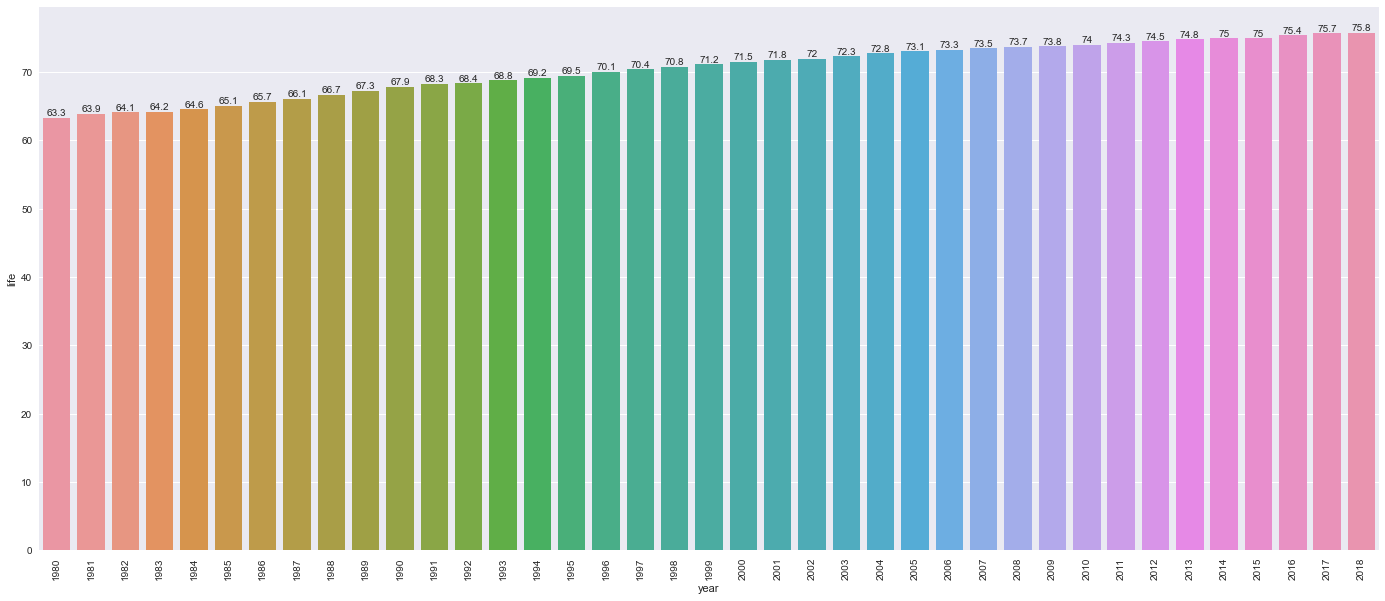

In [121]:
# definindo a precisão do ponto flutuante
pd.set_option("display.float_format", lambda x: locale.format_string("%.2f", x, grouping=True))

# filtrando o dataset
year_values=range(1980,2019)
variable_values=["npopul999i"]
df_filtered = dfWidBR_merged[(dfWidBR_merged.year.isin(year_values)) & (dfWidBR_merged.variable.isin(variable_values))]

# criando o gráfico
df = pd.DataFrame(df_filtered, columns=["year", "life"]).sort_values("life",ascending=False)
plt.figure(figsize=(24,10))
plt.style.use(["seaborn"])

# incluindo labels nas barras
ax = sns.barplot(x=df.year,y=df.life,data=df)
for i in ax.containers:
    ax.bar_label(i,)
    
plt.xticks(rotation=90) 
plt.show()

Observamos acima que a expectativa de vida da população brasileira teve um aumento de aproximadamente 20% em 38 anos.

##### 4. Qual a evolução do Índice de Desenvolvimento Humano (IDH) no Brasil no período de 1989 a 2018?

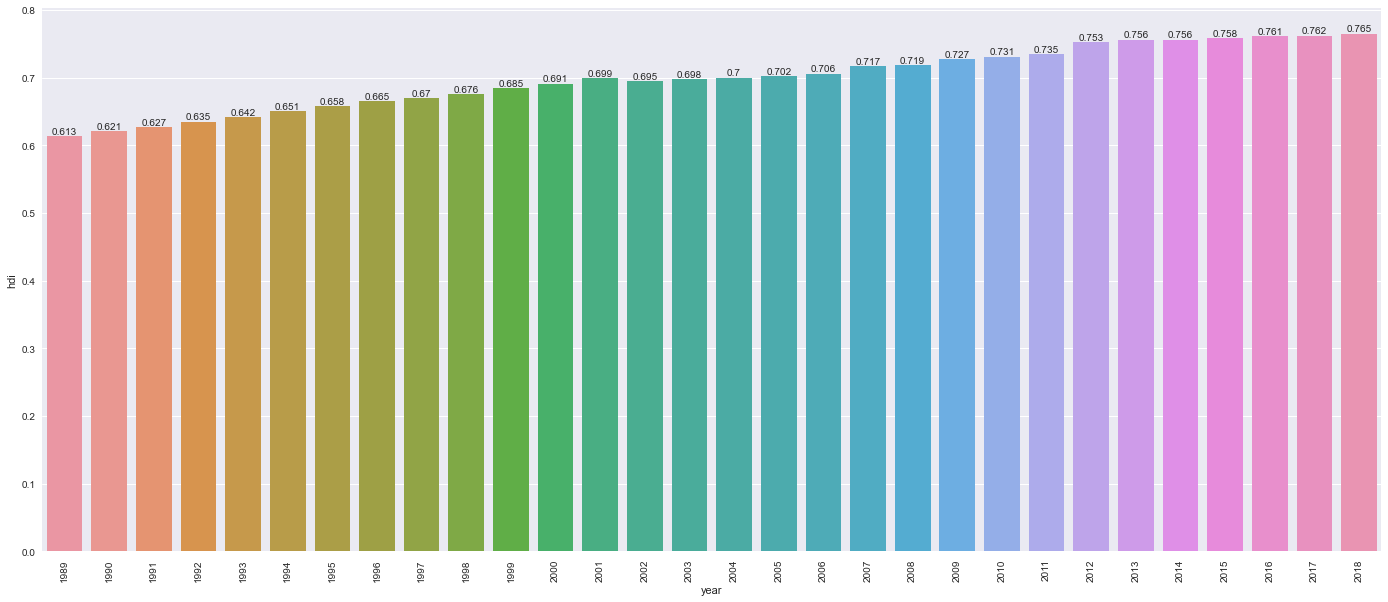

In [122]:
# definindo a precisão do ponto flutuante
pd.set_option("display.float_format", lambda x: locale.format_string("%.2f", x, grouping=True))

# filtrando o dataset
year_values=range(1989,2019)
variable_values=["npopul999i"]
df_filtered = dfWidBR_merged[(dfWidBR_merged.year.isin(year_values)) & (dfWidBR_merged.variable.isin(variable_values))]

# criando o gráfico
df = pd.DataFrame(df_filtered, columns=["year", "hdi"]).sort_values("hdi",ascending=False)
plt.figure(figsize=(24,10))
plt.style.use(["seaborn"])

# incluindo labels nas barras
ax = sns.barplot(x=df.year,y=df.hdi,data=df)
for i in ax.containers:
    ax.bar_label(i,)
    
plt.xticks(rotation=90) 
plt.show()

Observamos acima que o Índice de Desenvolvimento Humano (IDH) da população brasileira teve um aumento de aproximadamente 25% em 29 anos.